In [3]:
ls

FuelConsumption.csv  SImple_Linear_Regressor.ipynb


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pylab as pl 
%matplotlib inline

In [6]:
# Read dataset:
data_frame = pd.read_csv('FuelConsumption.csv')

# Show dataset: 
data_frame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
created_data_frame = data_frame[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
created_data_frame.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,9.9,8.5,196
1,2.4,4,7.7,11.2,9.6,221
2,1.5,4,5.8,6.0,5.9,136
3,3.5,6,9.1,12.7,11.1,255
4,3.5,6,8.7,12.1,10.6,244
5,3.5,6,7.7,11.9,10.0,230
6,3.5,6,8.1,11.8,10.1,232
7,3.7,6,9.0,12.8,11.1,255
8,3.7,6,9.5,13.4,11.6,267


Text(0, 0.5, 'Emission')

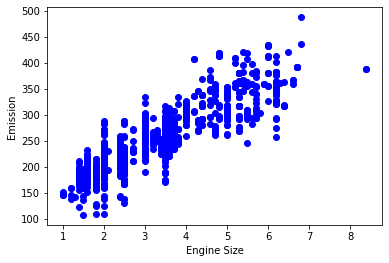

In [9]:
# Plot Emission vs Engine Size:
plt.scatter(created_data_frame.ENGINESIZE, created_data_frame.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission') 

In [10]:
# Create train/test plit:
mask = np.random.rand(len(data_frame)) < 0.8
train_data = created_data_frame[mask]
test_data = created_data_frame[~mask]

Text(0, 0.5, 'Emission')

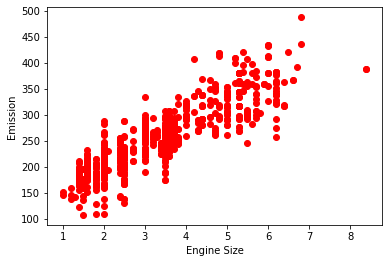

In [11]:
# PLot training data:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [13]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
x_train = np.asanyarray(train_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train_data[['CO2EMISSIONS']])
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Get coefficients and intercept:
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Coefficients:  [[11.66095612  7.18865307  9.23486414]]
Intercept:  [67.97068534]


In [19]:
y_hat = regressor.predict(test_data[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB']])
x_pred = np.asanyarray(test_data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
y_pred = np.asanyarray(test_data[['CO2EMISSIONS']])
rss = np.mean((y_hat-y_pred)**2)
vr_score = regressor.score(x_pred, y_pred)
print('Residual sum of squares: ', rss)
print('Variance score: ', vr_score)

Residual sum of squares:  590.1169698652374
Variance score:  0.8698836899882418
